In [2]:
import glob
import json
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_result_df(files):
    result = []
    for file in glob.glob(files):
        print(f'processing {file}')
        try:
            with open(file, 'r') as f:
                result.extend(json.load(f))
        except Exception:
            continue

    return pd.DataFrame(result)

def make_pivot_table(df, col):
    return df.pivot('dataset', 'method', col)

def get_accuracy_table(df):
    df_acc = df.drop(['cov_drift_detected',
                      'dis_drift_detected',
                      'lab_drift_detected'], axis=1)
    return df_acc.pivot('dataset', 'method', 'accuracy')

def get_numdrift_table(df):
    c = df['cov_drift_detected'].astype(str)
    d = df['dis_drift_detected'].astype(str)
    l = df['lab_drift_detected'].astype(str)

    df_drift = df.drop(['accuracy',
                        'cov_drift_detected',
                        'dis_drift_detected',
                        'lab_drift_detected'], axis=1)
    df_drift['drift_detected'] = c + '/' + d + '/' + l
    
    return df_drift.pivot('dataset', 'method', 'drift_detected')

In [3]:
real_world_df = get_result_df('results/real-world/*.json')
real_world_df

processing results/real-world/chessweka.json
processing results/real-world/outdoorStream.json
processing results/real-world/rialto.json
processing results/real-world/airlines2.json
processing results/real-world/elec.json
processing results/real-world/covtype.json
processing results/real-world/spam.json
processing results/real-world/poker.json
processing results/real-world/phishing.json
processing results/real-world/weather.json
processing results/real-world/LUdata.json


,dataset,method,cov_drift_detected,dis_drift_detected,lab_drift_detected,cov_p_values,dis_p_values,lab_p_values,accuracy
0,chessweka,SDD,2,2,1,"[1.0, 0.31925014518032724, 0.15771410359108828...","[1.0, 0.31925014518032724, 0.15771410359108828...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.92820862...",0.715415
1,chessweka,HDD,2,2,1,"[0.31731, 0.31731050786291415, 0.1564648215302...","[0.31731, 0.31731050786291415, 0.1564648215302...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.92799256...",0.715415
2,chessweka,BDD,2,0,0,[],[],[],0.660079
3,outdoorStream,SDD,22,21,21,"[1.0, 0.9849357166936018, 0.9948136633816169, ...","[1.0, 0.9755537823803191, 0.9711108075142433, ...","[1.0, 0.9554305378362636, 0.9105964769163282, ...",0.160800
4,outdoorStream,HDD,20,21,20,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9276939483429124, ...","[1.0, 1.0, 0.9280819031042273, 0.9280819031042...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.164267
5,outdoorStream,BDD,21,0,0,[],[],[],0.161333
6,rialto,SDD,463,467,468,"[1.0, 0.9934440364543609, 0.9705045539260984, ...","[1.0, 0.9970323964388096, 0.9859045841697418, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.639683
7,rialto,HDD,403,427,466,"[1.0, 1.0, 0.9275839994081094, 0.9275839994081...","[1.0, 0.8970353677278408, 0.8970353677278408, ...","[0.31731, 0.31731, 0.31731, 0.31731, 0.31731, ...",0.650390
8,rialto,BDD,465,0,0,[],[],[],0.638768
9,airlines2,SDD,3081,3081,3080,"[1.0, 0.31925014518032724, 0.15771410359108828...","[1.0, 0.31925014518032724, 0.15771410359108828...","[1.0, 0.9141761524581447, 0.828443319627431, 0...",0.584711


In [4]:
get_accuracy_table(real_world_df)

method,BDD,HDD,SDD
dataset,,,
LUdata,0.998789,0.998789,0.999394
airlines2,0.586225,0.584711,0.584711
chessweka,0.660079,0.715415,0.715415
covtype,0.515314,0.509517,0.509517
elec,0.762172,0.764192,0.747548
outdoorStream,0.161333,0.164267,0.160800
phishing,0.905137,0.912170,0.908653
poker,0.687419,0.687263,0.687263
rialto,0.638768,0.650390,0.639683


In [5]:
get_numdrift_table(real_world_df)

method,BDD,HDD,SDD
dataset,,,
LUdata,10/0/0,7/5/9,9/9/9
airlines2,3081/0/0,3081/3081/3080,3081/3081/3080
chessweka,2/0/0,2/2/1,2/2/1
covtype,3318/0/0,3160/3160/3317,3318/3318/3317
elec,258/0/0,250/255/256,257/258/257
outdoorStream,21/0/0,20/21/20,22/21/21
phishing,62/0/0,31/34/61,61/62/61
poker,4731/0/0,3796/3796/4730,4731/4731/4730
rialto,465/0/0,403/427/466,463/467/468


In [6]:
def get_p_value_graph(df, dataset, method, ax, pval=None):
    y = df[(df['dataset'] == dataset) & (df['method'] == method)]
    
    cov_p_values = y['cov_p_values'].values[0]
    dis_p_values = y['dis_p_values'].values[0]
    lab_p_values = y['lab_p_values'].values[0]
    
    x = np.arange(len(cov_p_values))

    ax.plot(x, cov_p_values, label='covariate')
    ax.plot(x, dis_p_values, label='distribution')
    ax.plot(x, lab_p_values, label='label')
    if pval is not None:
        ax.plot(x, [pval] * len(x), '--')
    ax.set_xlabel(method)

In [15]:
def get_dataset_graph(df, dataset, legend=True, pval=None, ylim=None):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False)
    for ax, method in zip(axes, ['HDD', 'SDD']):
        get_p_value_graph(df, dataset, method, ax, pval)
        if ylim is not None:
            ax.set_ylim(ylim)
    if legend:
        plt.legend()
    fig.suptitle(dataset)

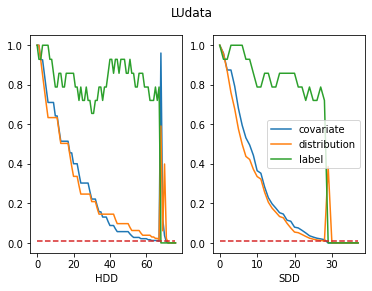

In [17]:
get_dataset_graph(real_world_df, 'LUdata', pval=0.01)
plt.show()

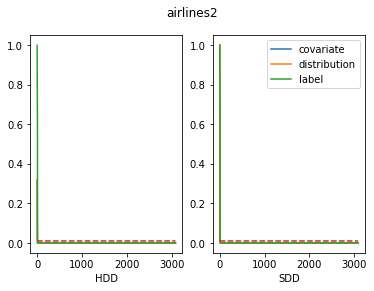

In [9]:
get_dataset_graph(real_world_df, 'airlines2', pval=0.01)
plt.show()

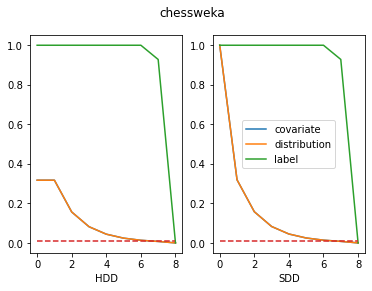

In [10]:
get_dataset_graph(real_world_df, 'chessweka', pval=0.01)
plt.show()

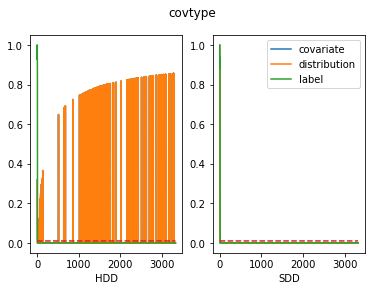

In [11]:
get_dataset_graph(real_world_df, 'covtype', pval=0.01)
plt.show()

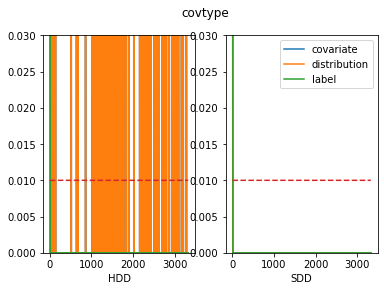

In [19]:
get_dataset_graph(real_world_df, 'covtype', pval=0.01, ylim=(0, 0.03))

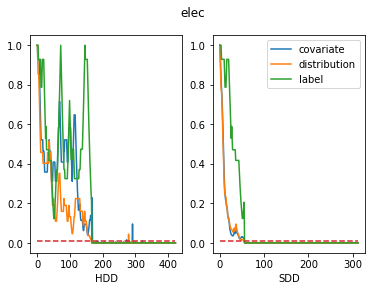

In [112]:
get_dataset_graph(real_world_df, 'elec', pval=0.01)
plt.show()

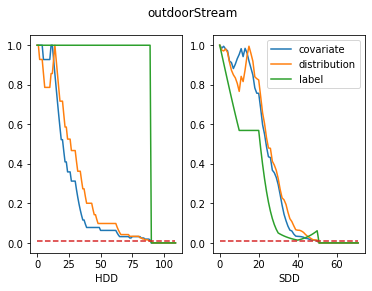

In [113]:
get_dataset_graph(real_world_df, 'outdoorStream', pval=0.01)
plt.show()

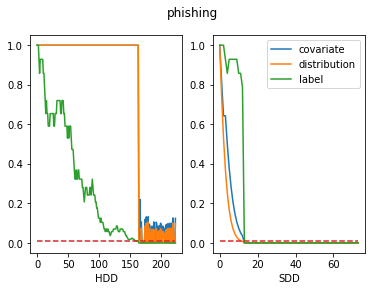

In [115]:
get_dataset_graph(real_world_df, 'phishing', pval=0.01)
plt.show()

In [1]:
get_dataset_graph(real_world_df, 'poker', pval=0.01)
plt.show()

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


NameError: name 'get_dataset_graph' is not defined

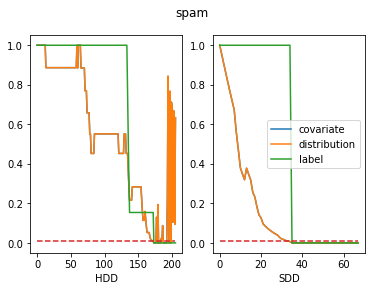

In [117]:
get_dataset_graph(real_world_df, 'spam', pval=0.01)
plt.show()

In [82]:
artificial_df = get_result_df('results/artificial/*.json')
get_accuracy_table(artificial_df)

processing results/artificial/sea_stream.json
processing results/artificial/moving_squares.json
processing results/artificial/mixedDrift.json
processing results/artificial/sea_big.json
processing results/artificial/movingRBF.json
processing results/artificial/rotatingHyperplane.json
processing results/artificial/transientChessboard.json
processing results/artificial/interchangingRBF.json


method,BDD,HDD,SDD
dataset,,,
interchangingRBF,0.926613,0.925227,0.925837
mixedDrift,0.704887,0.705834,0.705349
movingRBF,0.613046,0.614418,0.614498
moving_squares,0.725186,0.722058,0.722929
rotatingHyperplane,0.749212,0.749242,0.748441
sea_big,0.785043,0.788140,0.787930
sea_stream,0.792478,0.789887,0.789761
transientChessboard,0.530653,0.412315,0.531695


In [83]:
get_numdrift_table(artificial_df)

method,BDD,HDD,SDD
dataset,,,
interchangingRBF,1139/0/0,3/1/1132,353/828/1127
mixedDrift,3373/0/0,3/5/3368,2906/3292/3371
movingRBF,1142/0/0,1138/1138/1140,1142/1141/1141
moving_squares,1142/0/0,1/1141/1137,0/1142/1141
rotatingHyperplane,1142/0/0,1139/1139/1141,1141/1142/1141
sea_big,570/0/0,554/561/569,568/569/569
sea_stream,228/0/0,211/213/226,227/227/227
transientChessboard,1096/0/0,97/101/164,1100/1112/1139


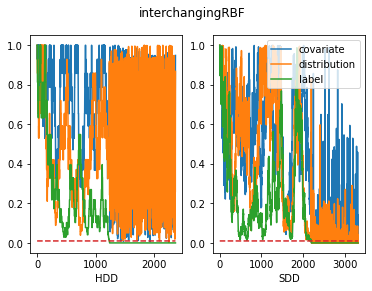

In [118]:
get_dataset_graph(artificial_df, 'interchangingRBF', pval=0.01)
plt.show()

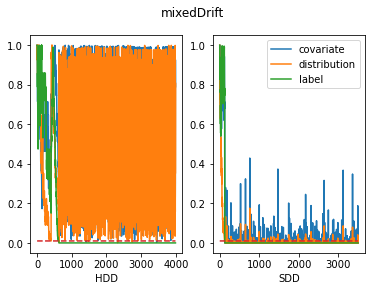

In [119]:
get_dataset_graph(artificial_df, 'mixedDrift', pval=0.01)
plt.show()

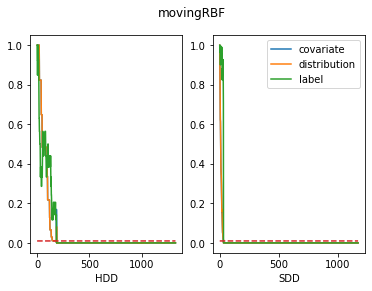

In [120]:
get_dataset_graph(artificial_df, 'movingRBF', pval=0.01)
plt.show()

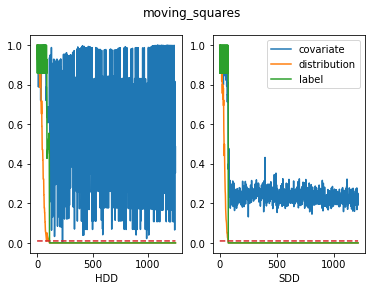

In [121]:
get_dataset_graph(artificial_df, 'moving_squares', pval=0.01)
plt.show()

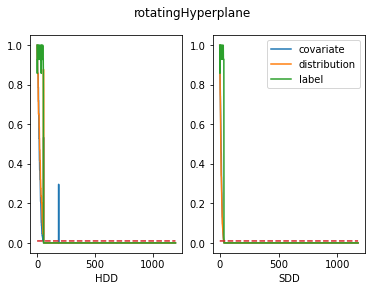

In [122]:
get_dataset_graph(artificial_df, 'rotatingHyperplane', pval=0.01)
plt.show()

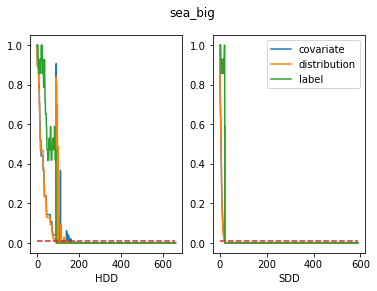

In [123]:
get_dataset_graph(artificial_df, 'sea_big', pval=0.01)
plt.show()

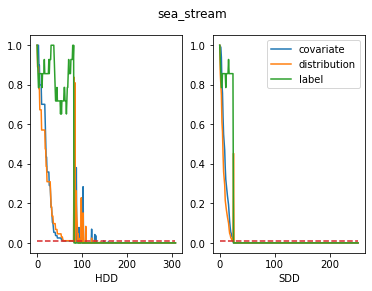

In [124]:
get_dataset_graph(artificial_df, 'sea_stream', pval=0.01)
plt.show()

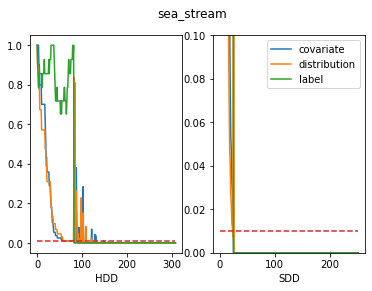

In [127]:
get_dataset_graph(artificial_df, 'sea_stream', pval=0.01)
plt.ylim(0, 0.1)
plt.show()

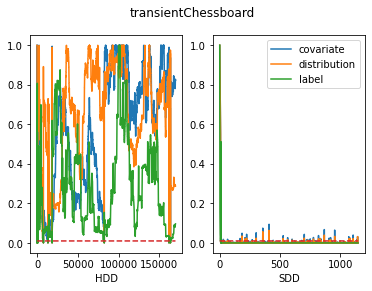

In [125]:
get_dataset_graph(artificial_df, 'transientChessboard', pval=0.01)
plt.show()

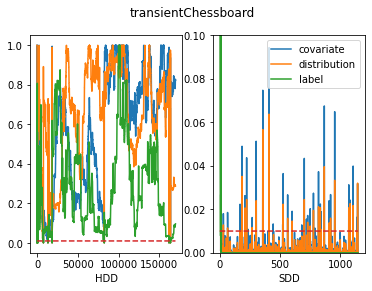

In [126]:
get_dataset_graph(artificial_df, 'transientChessboard', pval=0.01)

plt.ylim(0, 0.1)
plt.show()